# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<p><i><b>Цель</b></i></p>
<ul>
    <li> научится определять рыночную стоимость </li>
    <li>установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.</li>
</ul>
<p><i><b>Ход исследования</b></i></p>
<ul>
    <li>Предварительная оброботка данных (знакомство с даннными, заполнение пропусков, обработка дубликатов) </li>
    <li> Работа с данными (добавление новых признаков) </li>
    <li> Анализ данных (визуализация данных, выявление зависимостей) </li>

### Откройте файл с данными и изучите общую информацию. 

In [4]:
import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings


load_dotenv()
warnings.filterwarnings('ignore')

In [5]:
# вынесем фичи, которые нам потребуются далее

class MyException(Exception):
    """Кастомная ошибка."""
    
    def __init__(self, text):
        """Активация класса."""
        text = self.text

def wrapper(func):
    """Кастомный декоратор для вывода кол-ва дубликатов."""
    def wrapper_2(data):
        func(data)
        print('Кол-во дубликатов - {}'.format(data['locality_name'].duplicated().sum()))
    return wrapper_2

In [6]:
text = 'something wrong with path to file'

def read_data():
    """Читает данные."""
    data = pd.read_csv(os.getenv('real_estate', ''), sep='\t')
    if type(data) != pd.DataFrame:
        raise MyException(text)
    else:
        return data

# main logic
try:
    data = read_data()
except MyException:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    print('работаем на локалке')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


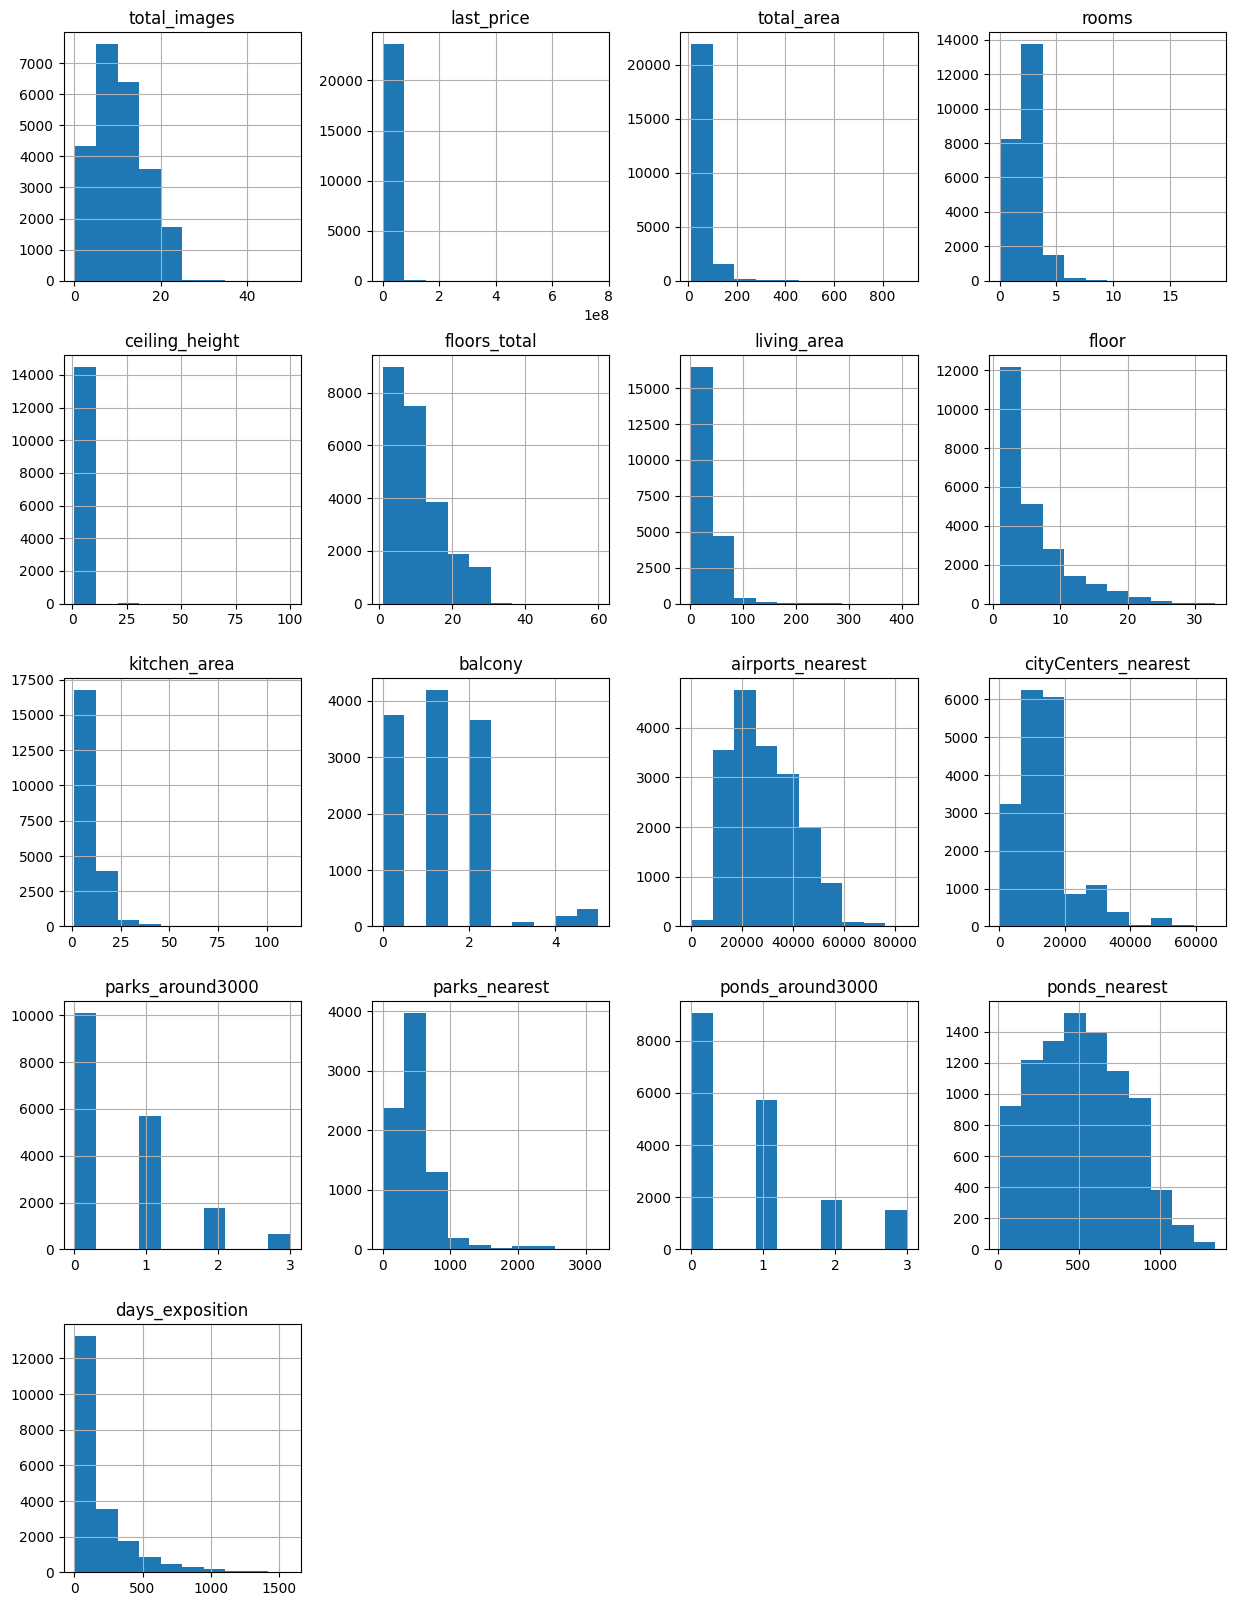

In [7]:
# знакомство с данными
for _ in [data.head(5), data.info(), data.describe()]:
    display(_)
data.hist(figsize=(15, 20))
plt.show();

### Предобработка данных

In [8]:
# смотрим количество пропусков
display(data.isna().sum())
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))
list_na = []
for column in data.columns:
    if data[column].isna().sum() != 0:
        list_na.append(column)
    else:
        continue
print('Пропуски обнаружены в', *list_na)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропуски обнаружены в ceiling_height floors_total living_area is_apartment kitchen_area balcony locality_name airports_nearest cityCenters_nearest parks_around3000 parks_nearest ponds_around3000 ponds_nearest days_exposition


Пропуски обнаружены в: ceiling_height, floors_total, living_area, is_apartment, kitchen_area balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

<div class="panel panel-info">
    <p>Попробуем заполнить пропуски</p>
Рассуждая по аналогии с балконами, если не указано значение в колонках: is_apartment, parks_around3000, ponds_around3000, то, скорее всего, помещение не является апартаментом, то есть ставим значение False (0), и в радиусе 3 км нет ни парков, ни водоемов - то есть, кажется логичным, поставить значение 0.
</div>

In [9]:
text = "Остались пропуски"
def replace_NAN_to_0(columns: list):
    """Заменяем пропуски на 0."""
    # main logic
    for _ in columns:
        if _ != 'balcony':
            data[_].fillna(value=0,
                           inplace=True)
        else:
            data[_].fillna(value=False,
                           inplace=True)
    # check result
        if data[_].isna().sum() != 0:
            raise MyException(text)

replace_NAN_to_0(['balcony', 'is_apartment',
                  'parks_around3000', 'ponds_around3000'])

<div class="panel panel-info">
Можно предположить, что количество этажей зависит от типа населенного пункта, в городе, очевидно, больше небоскребов, чем в деревне. Поэтому будем заполнять пропуски по медианным значениям населенных пунктов.
</div>

In [10]:
def categorize(row):
    """Категоризуем населенные пункты."""
    try:
        if 'пос' in row:
            return 'поселок'
        elif 'деревня' in row:
            return 'деревня'
        elif 'село' in row:
            return 'село'
        elif 'товарищество' in row:
            return 'товарищество'
        else:
            return 'город'
    except:
        return 'ошибка'

# Применяем функцию
data['urban_category'] = data['locality_name'].apply(categorize)

# Устраняем пропуски

for t in data['urban_category'].unique():
    data.loc[(data['urban_category'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['urban_category'] == t), 'floors_total'].median()

display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


<div class="panel panel-info">
    Займемся удалением дубликатов. Для этого приведем все локации к нижнему регистру и посчитаем кол-во дубликатов, затем уберем все категории населенных пунктов по нескольким причинам: уже вынесли их в отдельный столбец, так что происходит дублирование информации, а также, одни и теже населенные пункты попадаются под разными категориями, что приводит к появление неявных дубликатов. Опять посчитаем количество дубликатов, их должно было стать больше. Затем удаляем найденные дубликаты.
</div>

In [11]:
@wrapper
def find_drop_obvios_dupbl(data):
    """Работает с явными дубликатами."""
    data = data.drop_duplicates()
    

@wrapper
def find_dupbl(data):
    """Ищет дубликаты, возникщие из-за разных регистров."""
    data['locality_name'] = data['locality_name'].str.lower()

@wrapper
def find_dupbl_v1(data):
    """Ищет дубликаты, возникщие из-за типа населенного пункта."""
    for _ in [('ё', 'е'),
          ('городской поселок', 'поселок городского типа'),
          ('деревня ', ''),
          ('поселок городского типа ', ''),
          ('коттеджный поселок ' , ''),
          ('поселок ', ''),
          ('садовое товарищество ', ''),
          ('садоводческое некоммерческое товарищество ',''),
          ('при железнодорожной станции ', ''),
          ('станции ', '')]:
        data['locality_name'] = data['locality_name'].str.replace(*_, regex=True)

text='что-то пошло не так!'
def drop_dubl_in_data(data):
    """Удаляет дубликаты."""
    data = data.drop_duplicates(subset=['locality_name'])
    if data['locality_name'].duplicated().sum() != 0:
        raise MyException(text)

# main logic
find_drop_obvios_dupbl(data=data)
find_dupbl(data=data)
find_dupbl_v1(data=data)
drop_dubl_in_data(data)

# Если название не прописано, скажем об этом прямо
data['locality_name'].fillna(value='No_name', inplace=True) 

# Посмотрим, что получилось
data['locality_name'].sort_values().unique()

Кол-во дубликатов - 23334
Кол-во дубликатов - 23334
Кол-во дубликатов - 23391


array(['No_name', 'агалатово', 'александровская', 'алексеевка', 'аннино',
       'аро', 'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород

<div class="panel panel-info">
    Теперь попробуем заполнить пропуски в колонках _nearset. Можно предположить, что расстояние от здания до фасилити будет зависит от населенного пункта. Важно обратить внимание, что мы не сможем так убрать все пропуски, так как по некоторым городам такая информация вообще отсутствует (можно предположить, что там нет таких фасилити в принципе)
</div>

In [12]:
for column in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
    for t in data['locality_name'].unique():
        data.loc[
            (data['locality_name'] == t) & (data[column].isna()), 
            column
        ] = data.loc[(data['locality_name'] == t), column].median()

Уберем пропуски в колонке days_exposition. Для этого: заменим все пропуски на 0, затем вместо 0 подставим разницу между сегодняшним днем и днем публикации объявления, а также приведем first_day_exposition к нужному формату (не много нарушает последовательность, но без этого кина не будет)

In [13]:
# right format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['days_exposition'].fillna(value=0, inplace=True)

def define_days_exposition(row):
    """Заполняет пропуски"""
    if row['days_exposition'] == 0:
        row['days_exposition'] = datetime.date.today() - datetime.date(row['first_day_exposition'].year,
                                                                       row['first_day_exposition'].month,
                                                                       row['first_day_exposition'].day)
        return row['days_exposition']
    else:
        return row['days_exposition']

data['days_exposition'] = data.apply(func=define_days_exposition, axis=1)

Уберем артефакты из колонки ceiling_height, следуя инструкции из задания

In [14]:
data.loc[data['ceiling_height'] >=24, 'ceiling_height'] /= 10

<br>Поменяем тип данных в колонках:</br> 
1. is_apartment, studio, open_plan  - вместо bool - int, так будет удобнее анализировать
2. 'balcony', 'floors_total', 'days_exposition' - поменяем на целочисленный
<p>Важно отметить, что нет большого смысла менять все типы данных, так как, если я правильно понимаю это делается,чтобы сэкономить память, а фрейм у нас и так не очень большой.</p>

In [15]:
# смотрим какие типы данных нужно изменить
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [16]:
for column in ['is_apartment','studio', 'open_plan', 'balcony', 'floors_total']:
    data[column] = data[column].astype('int')

# Здесь все не очень прозрачно, сначала преобразуем в строку, отсекаем все не нужное, и переводим в целочисленное число
# Код ужасный, работает медленно, но по другому не вышло
for _ in range(len(data)):
    data['days_exposition'][_] = float(str(data['days_exposition'][_]).split(' ')[0])
data['days_exposition'].astype(int)

0        1883
1          81
2         558
3         424
4         121
         ... 
23694    2599
23695      45
23696    2272
23697     602
23698    2477
Name: days_exposition, Length: 23699, dtype: int32

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  int32         
 10  studio                23699 non-null  int32         
 11  open_plan             23699 non-null  int32         
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<p>Вывод</p>
В данном разделе была предпринята попытка провести первичную обработку данных, а именно:
<p>1. оценка кол-ва пропусков </p>
<p>2. заполнение пропусков </p>
<p>3. удаление дубликатов </p>
<p>4. работа с артефактами</p>
<p>5. приведение к более удобным типам данных</p>
<p>Пропуски могли возникнуть по причине неправильной выгрузки, в форме могли быть необязательные поля, человеческий фактор</p>

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
def find_price_per_metre(row):
    """Возвращает значения цены квадратного метра."""
    return row['last_price']/row['living_area']

def define_metre_to_city_center(row):
    """Возращает округленные значения расстояния до центра в киллометрах."""
    return round(row['cityCenters_nearest']/1000, 0)

def define_type_floor(row):
    """Возвращает тип этажа."""
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применим функции к фрейму
data['price_per_metr'] = data.apply(func=find_price_per_metre,
                                    axis=1)
data['killometr_to_city_center'] = data.apply(func=define_metre_to_city_center,
                                              axis=1)
data['type_floor'] = data.apply(func=define_type_floor,
                                axis=1)

# Создаем столбцы связанные с датами
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Были созданы столбцы:
1. price_per_metr - цена квадратного метра
2. killometr_to_city_center - расстояние до центра города
3. type_floor - тип этажа
4. weekday - день недели публикации объявления
5. month - месяц публикации объявления
6. year - год публикации объявления

### Проведите исследовательский анализ данных

В начале стоит построить гистограммы для численных переменных и для тех, для которых нужно по заданию построить гистограмму

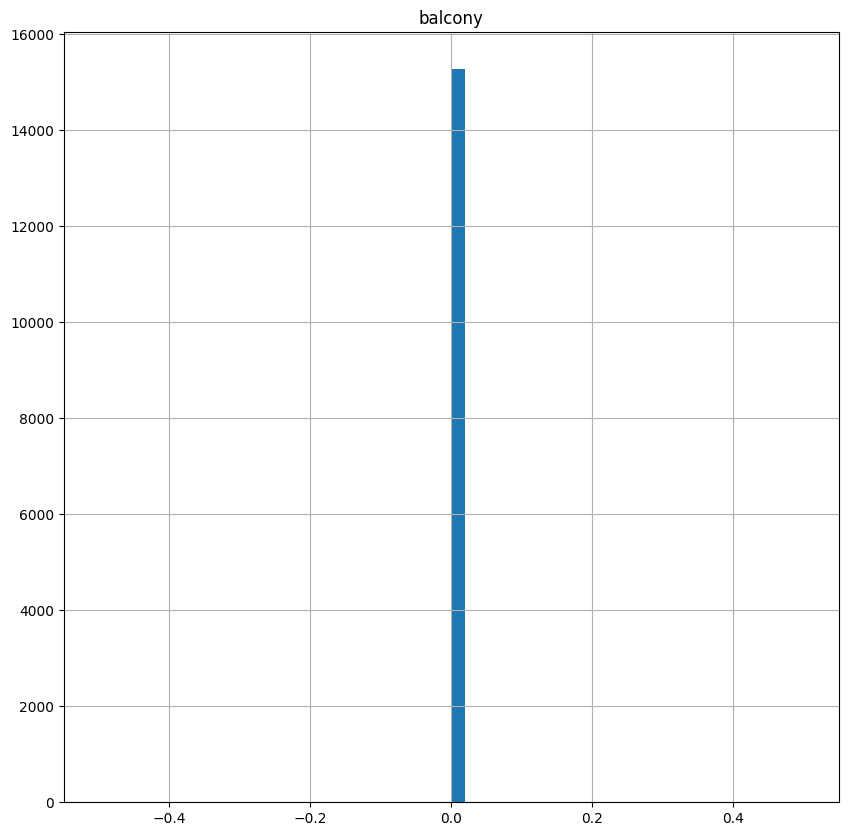

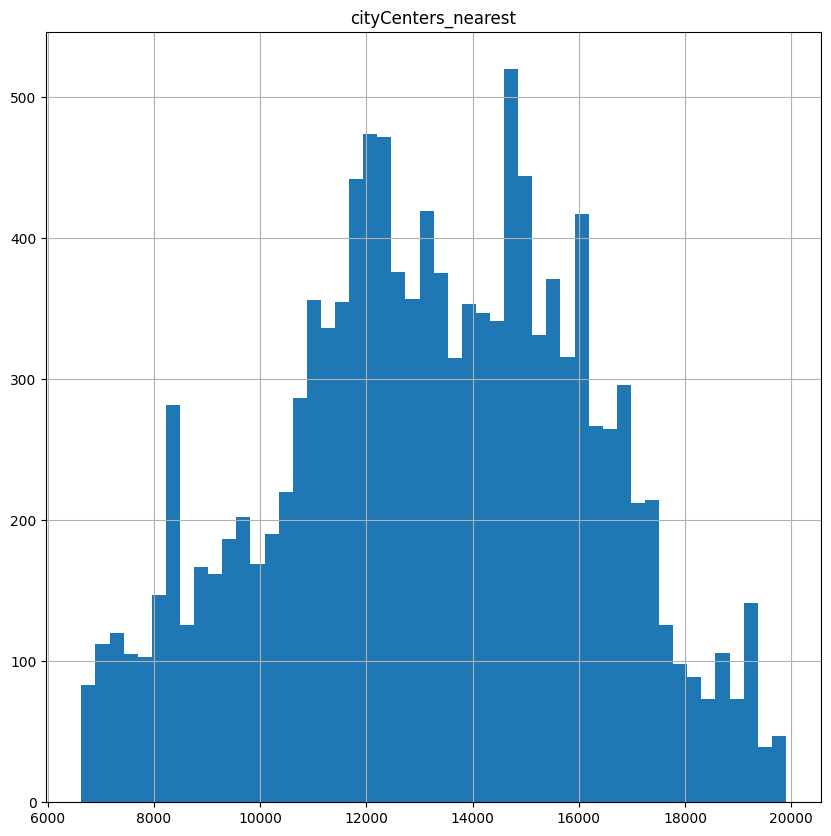

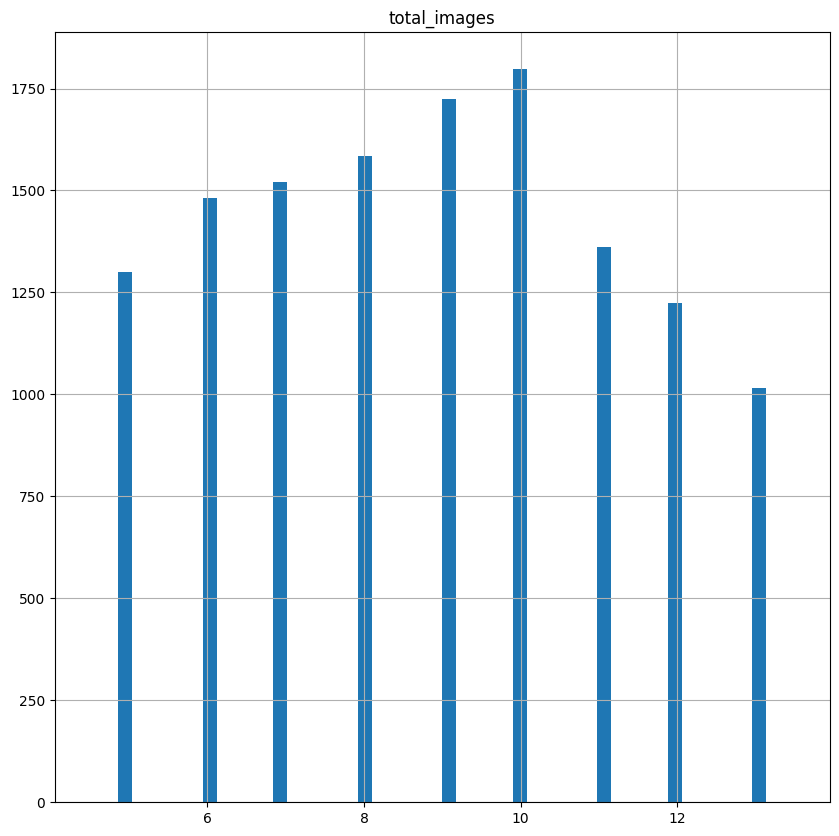

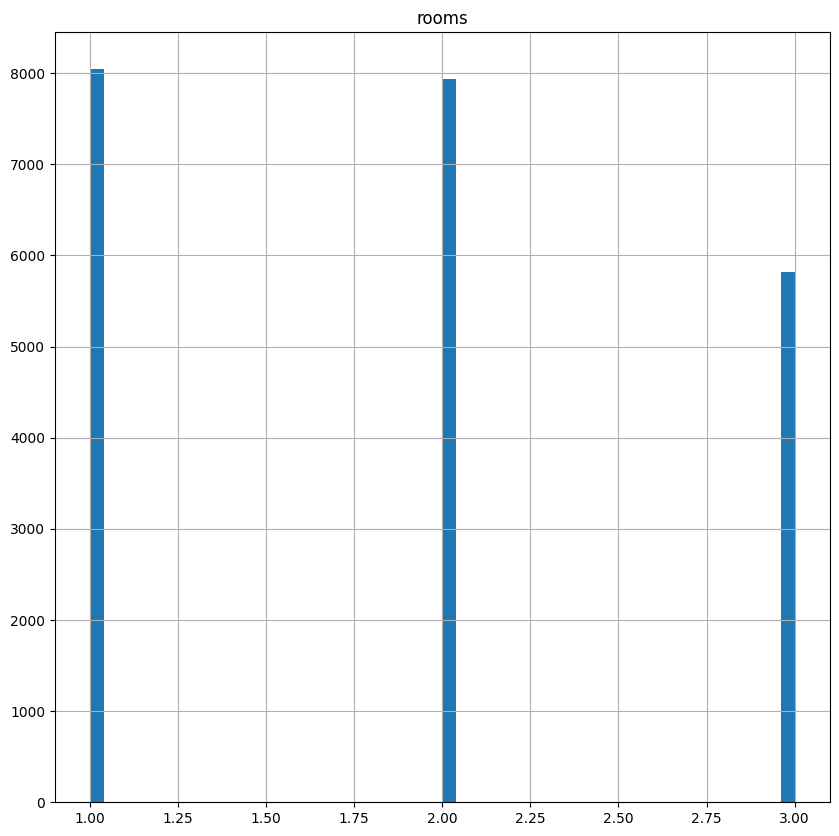

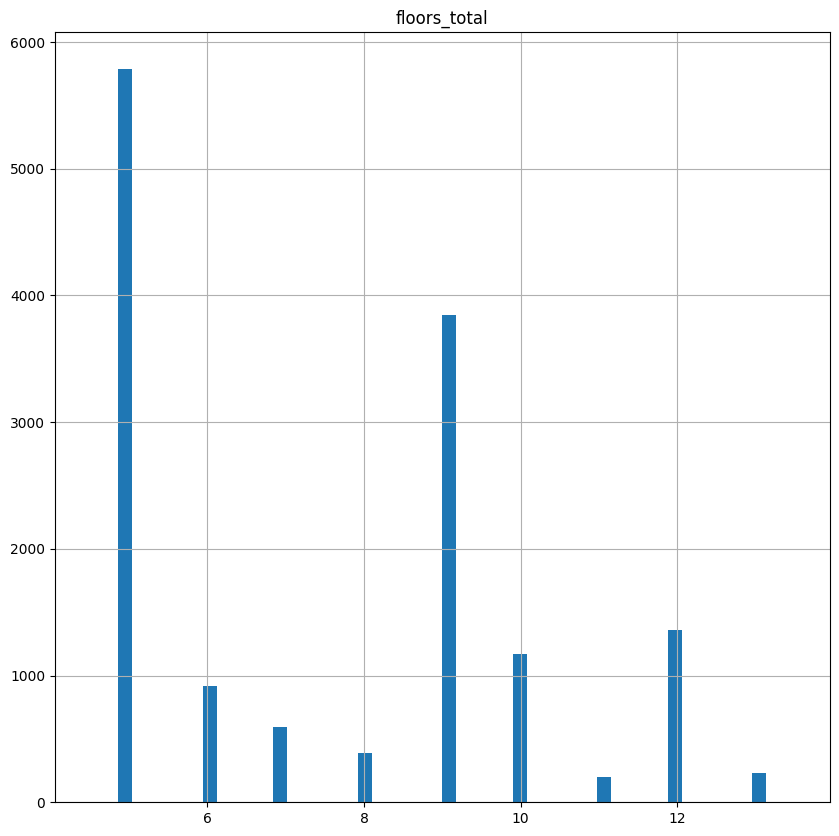

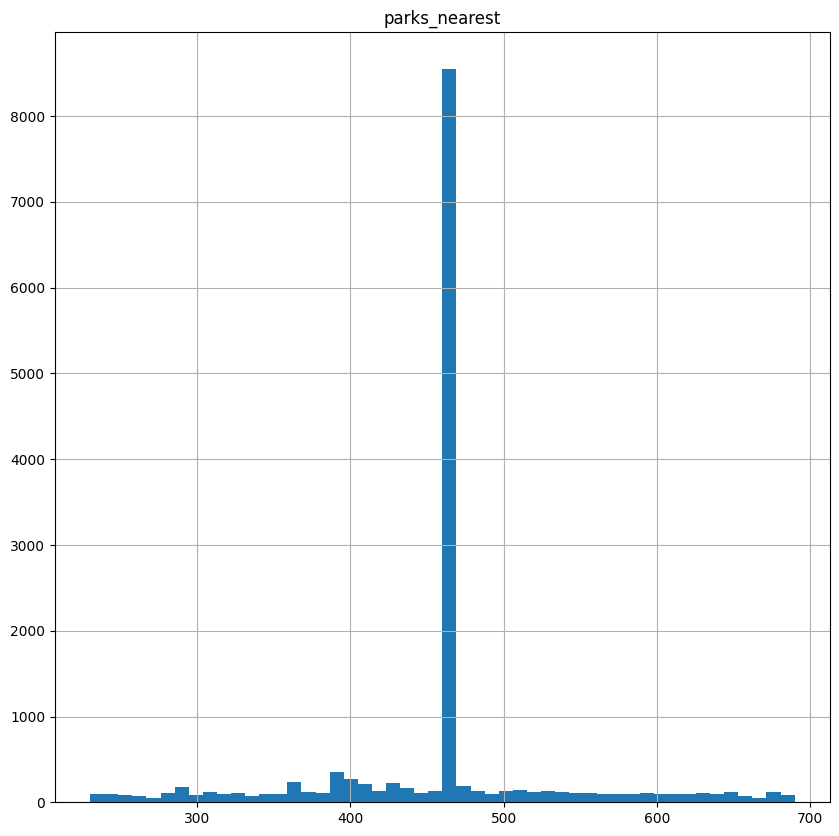

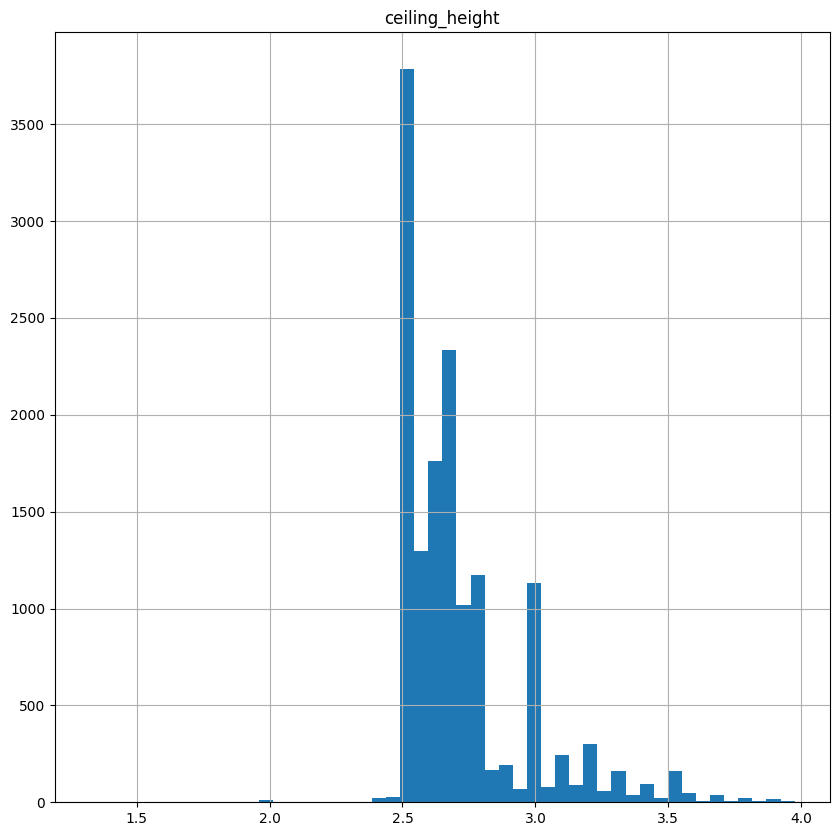

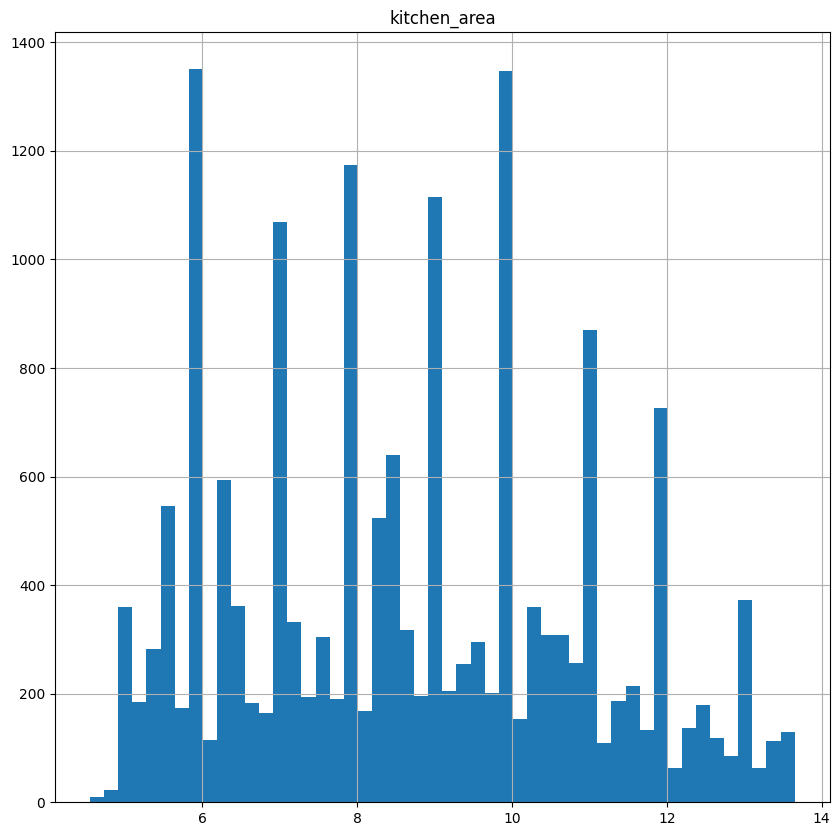

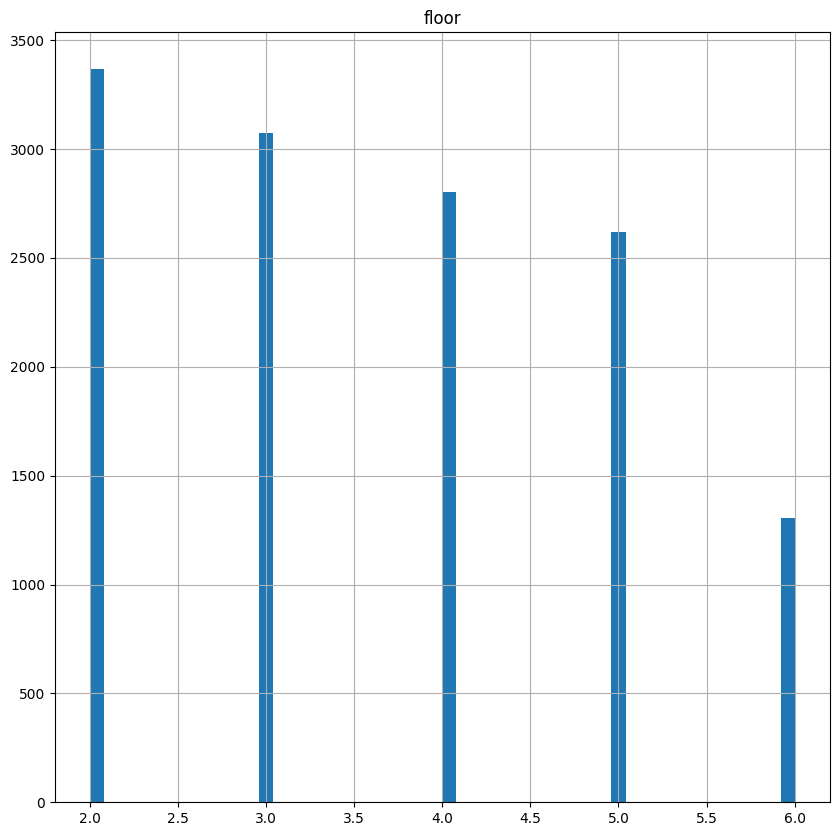

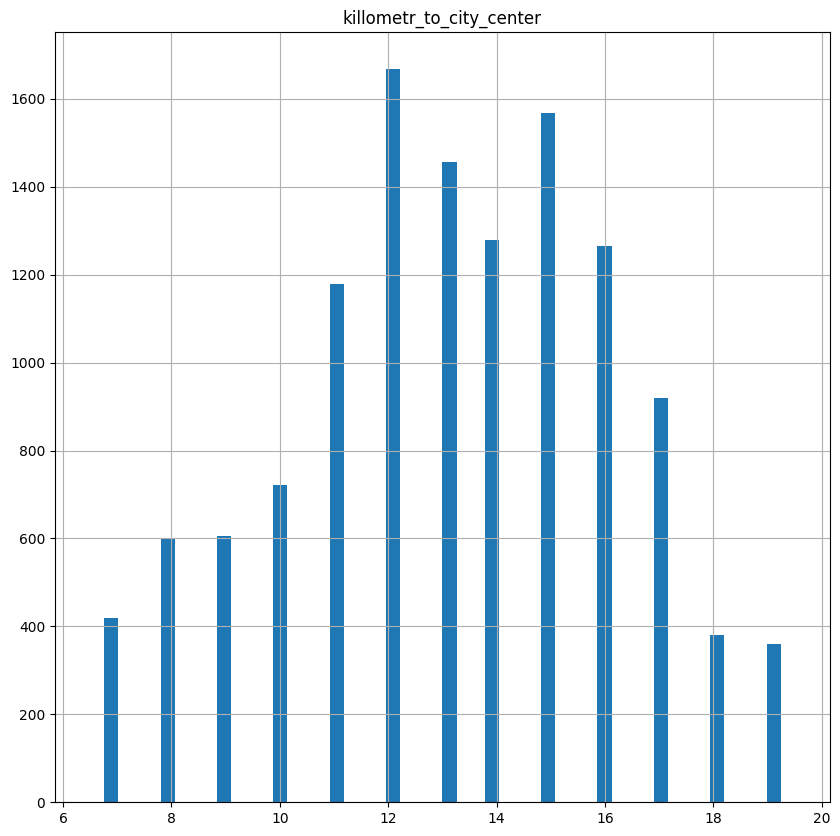

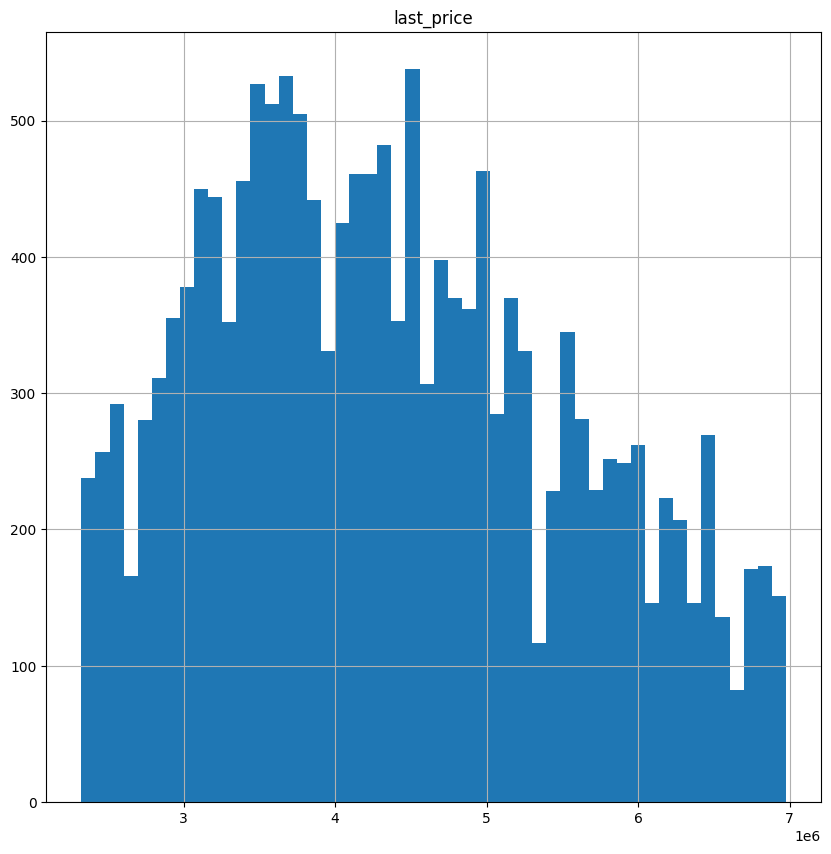

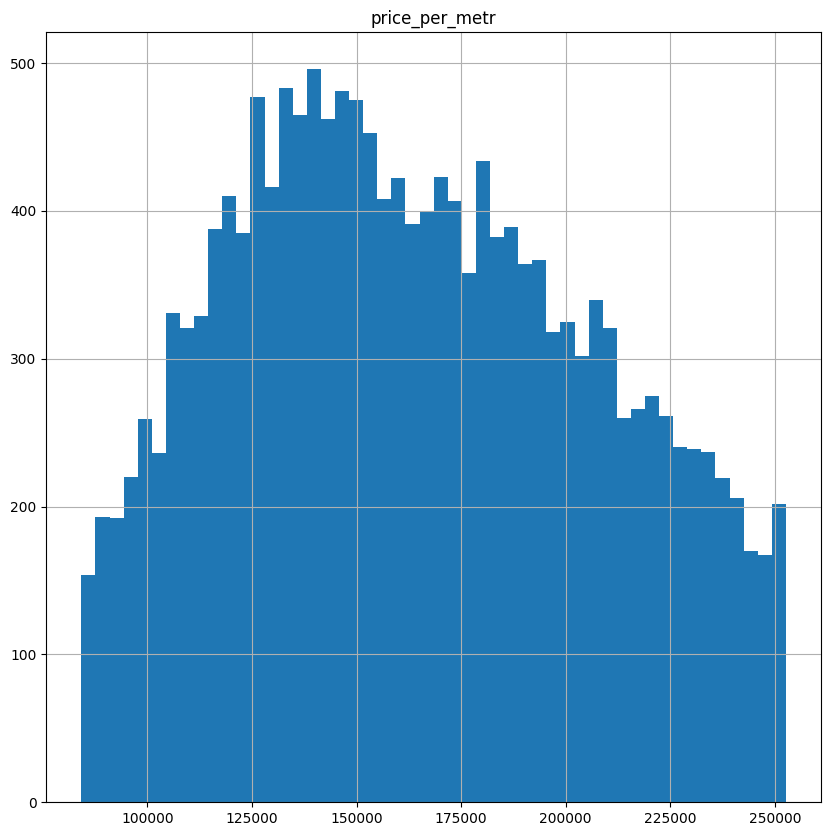

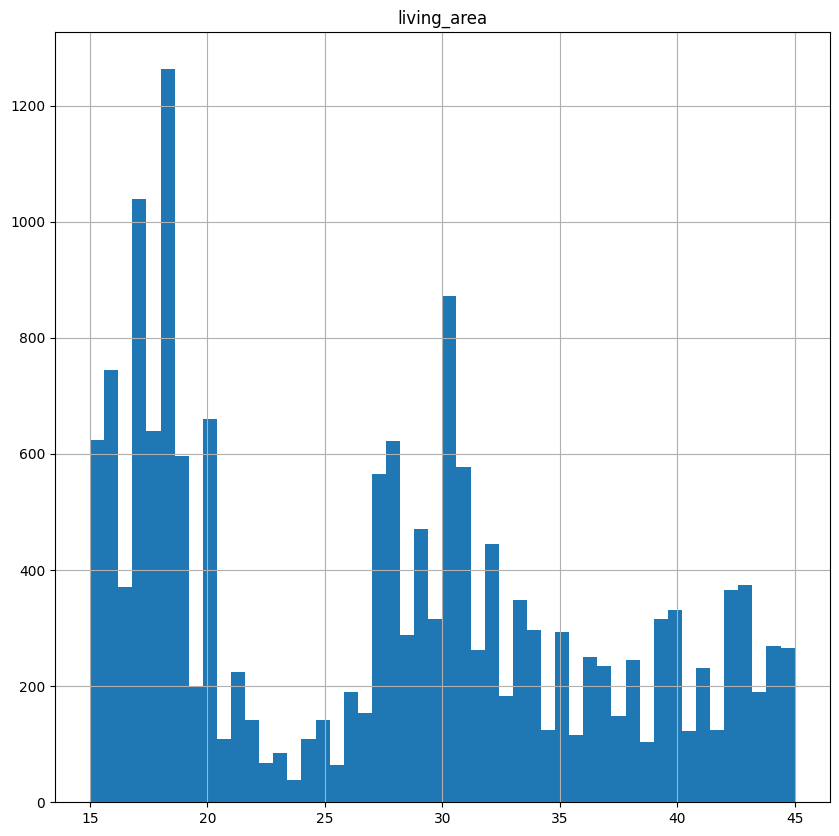

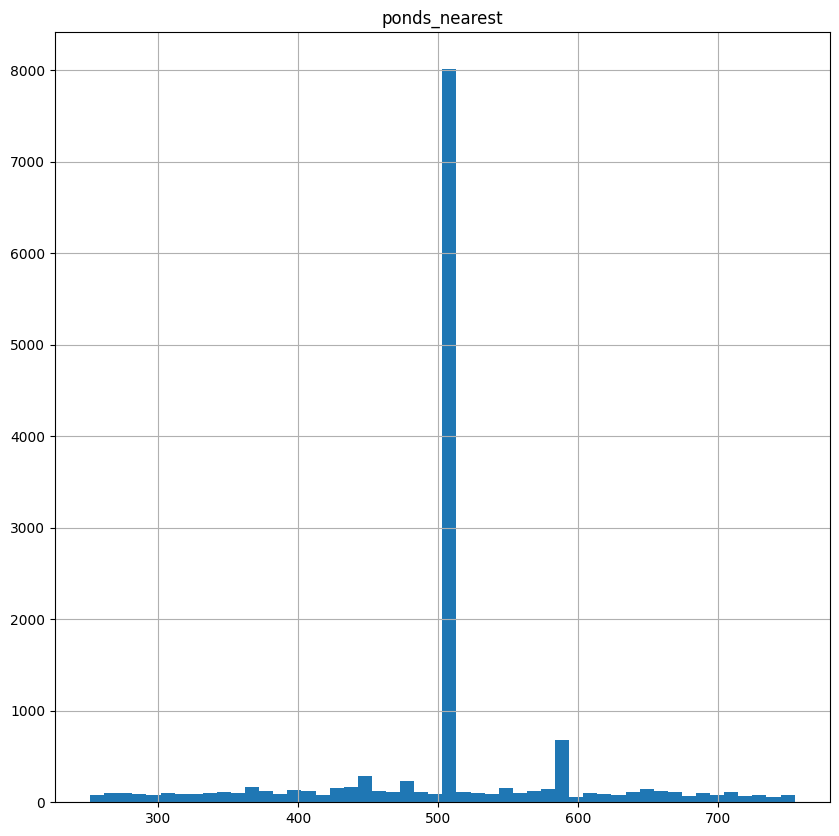

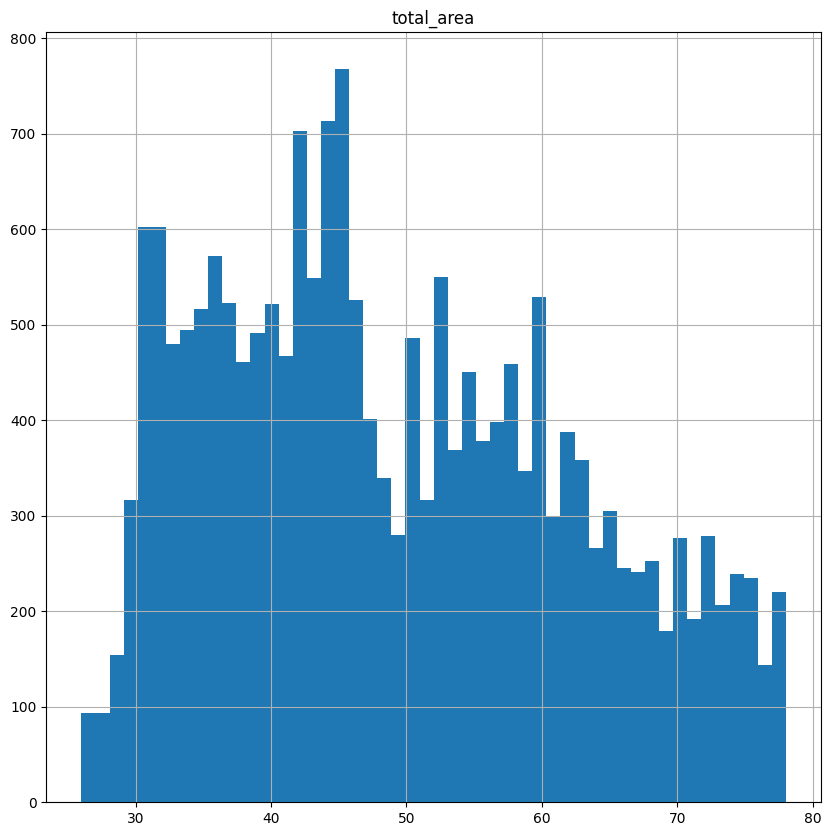

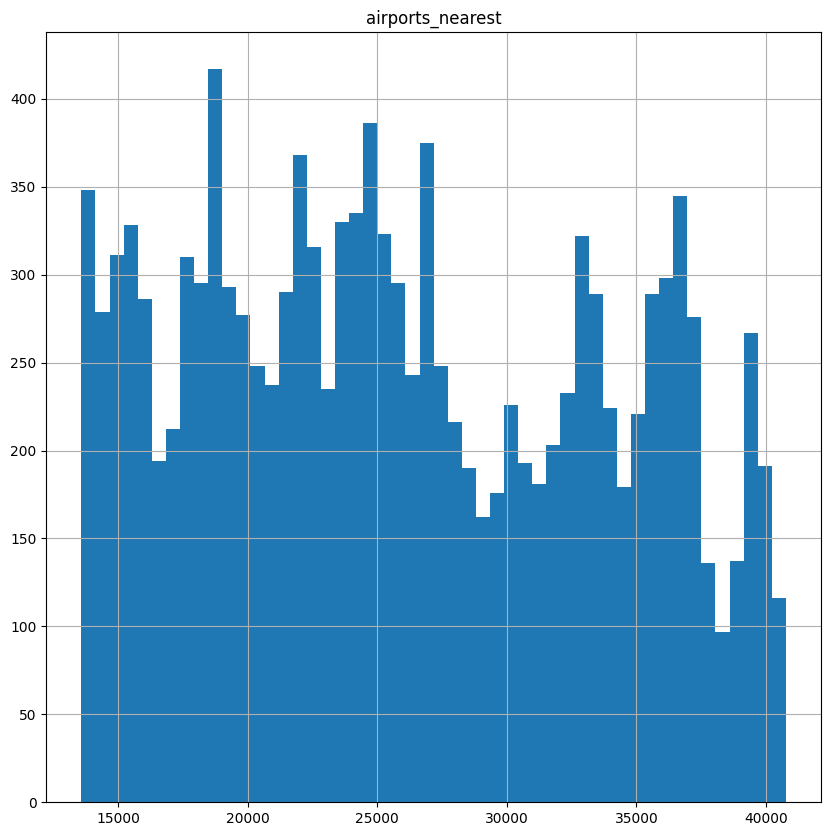

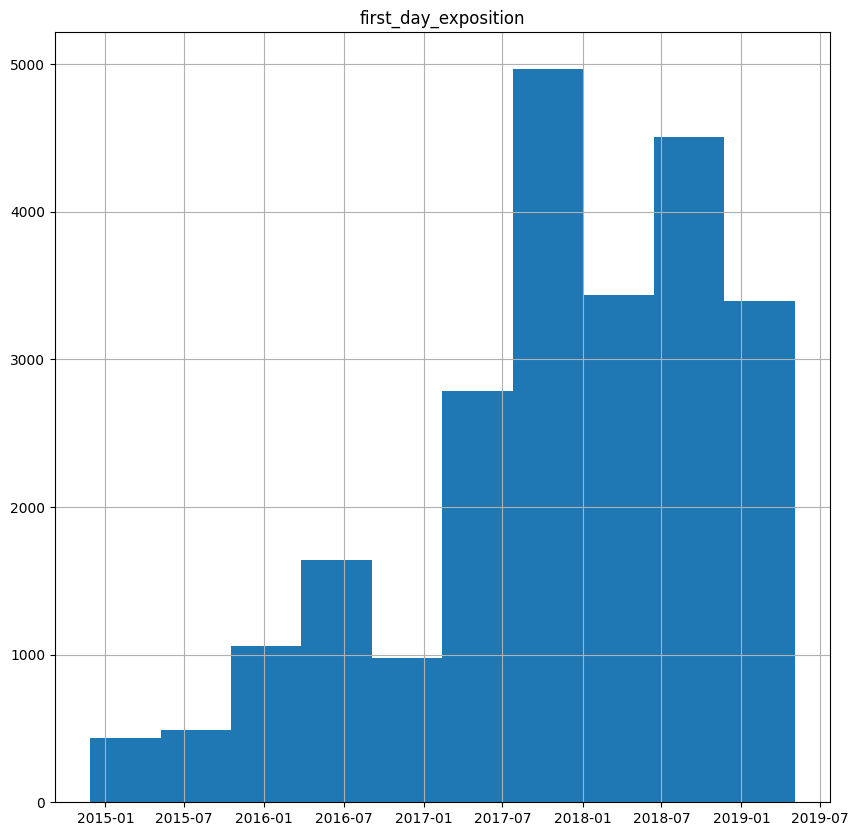

In [19]:
for column in (set(data.columns) - set(['first_day_exposition', 'locality_name', 'urban_category',
                                        'type_floor', 'days_exposition',
                                        'is_apartment', 'studio', 'open_plan',
                                        'parks_around3000', 'ponds_around3000',
                                        'weekday','month','year'])):
    data.hist(column,
              bins=50,
              range=(0.5*data[column].median(), 1.5*data[column].median()), 
              figsize=(10,10))
data.hist('first_day_exposition',
          figsize=(10,10));

Для предварительной оценки категориальных переменных будет использован график типа barplot

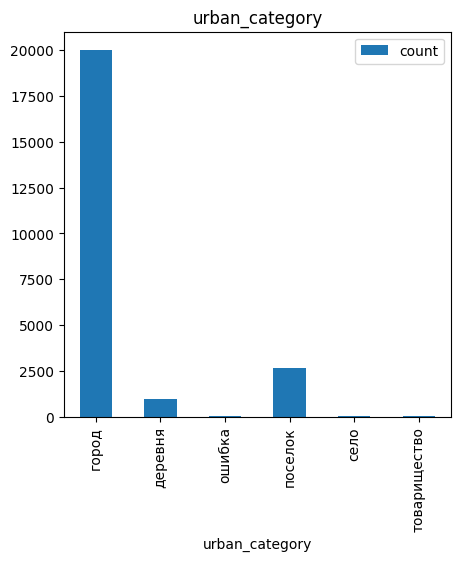

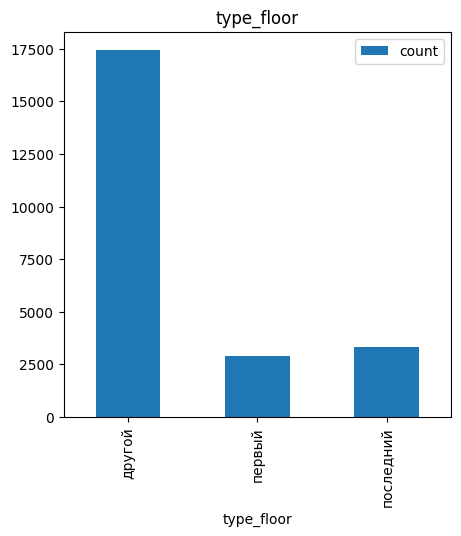

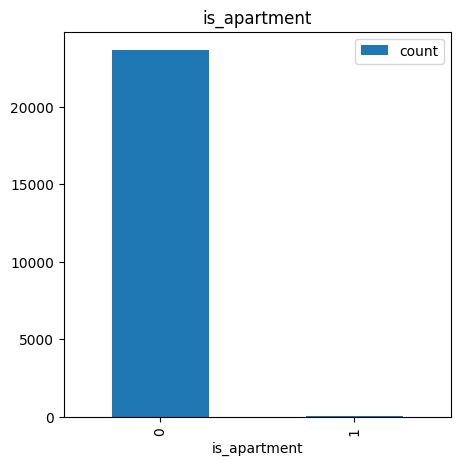

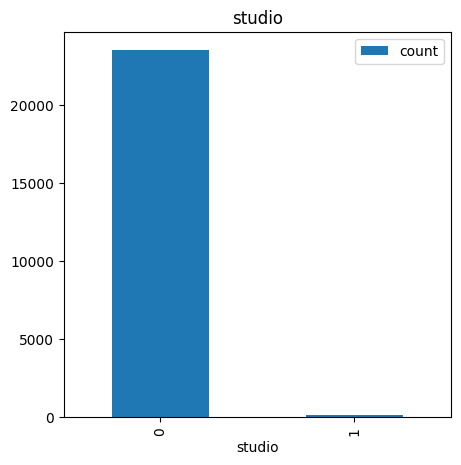

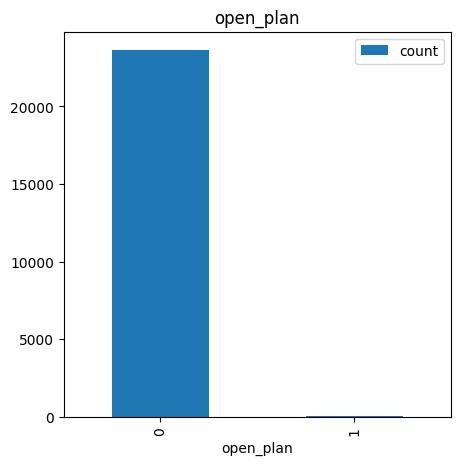

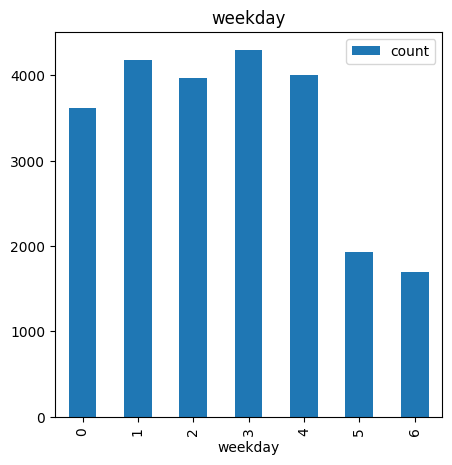

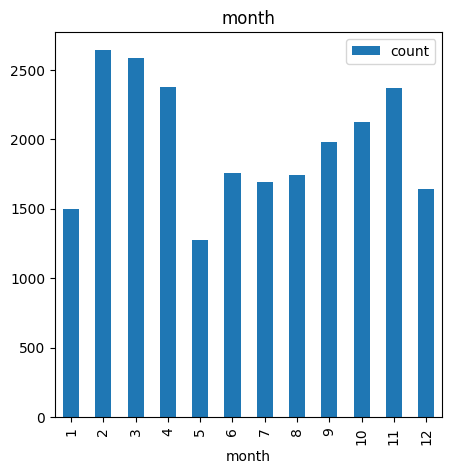

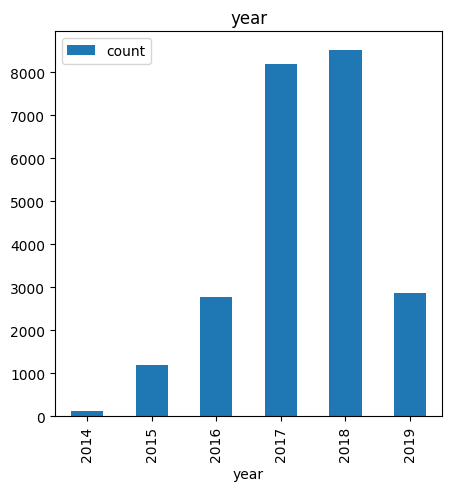

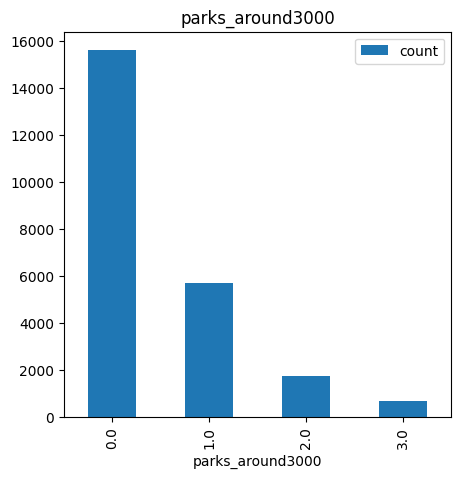

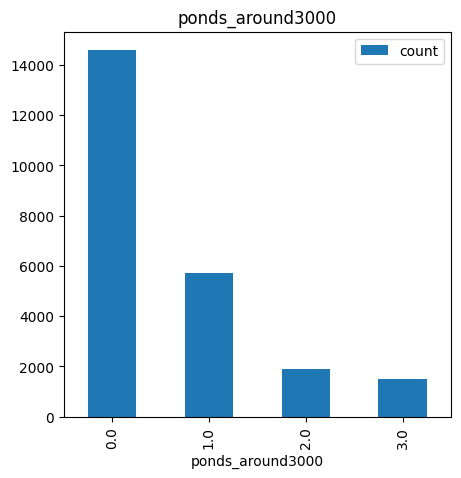

In [20]:
for column in ['urban_category', 'type_floor',
               'is_apartment', 'studio',
               'open_plan', 'weekday',
               'month','year', 
               'parks_around3000', 'ponds_around3000']:
    # в качестве значений использован столбец балконы, так как в нем нет пропусков
    p_t = data.pivot_table(index=column,
                           values='balcony',
                           aggfunc='count')
    p_t.columns = ['count']
    p_t.reset_index
    p_t.plot(kind='bar',
             figsize=(5,5),
             title=column)

<ul>
    <li>больше всего в выборке городов (но скорее всего, это из-за искаженности данных)</li>
    <li>больше всего квартир находяться между первым и послднем этажем</li>
    <li>наиболее частый тип квартиры - не апартаменты, не студия, с закрытой планировкой</li>
    <li> объявдения больше всего размещали по четвергам, в феврале, 2018</li>
    <li>квартир около парков или водоемов существенно меньше, чем без</li>
</ul>

Изучено, как быстро продавались квартиры (столбец days_exposition)

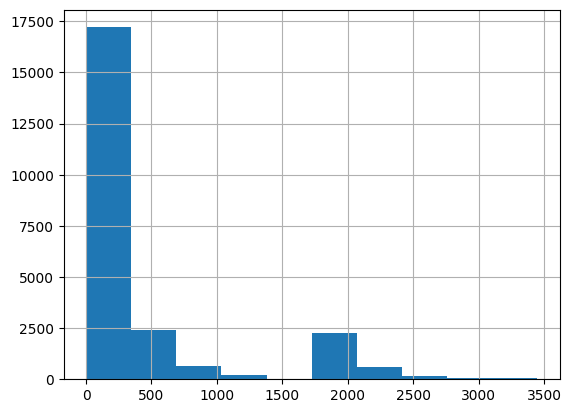

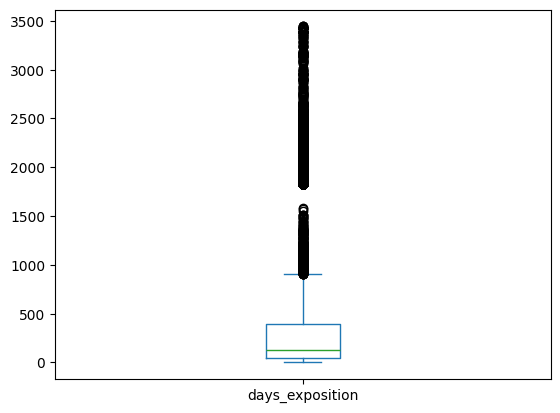

среднее: 430.92
медиана: 124.0
продажи быстрее 1.0 дней - необычно быстрые
продажи медленее 907.5 дней - необычно долгие
всего строк с необычными показателями - 3581, что составляет 15.11% от общего числа данных


In [21]:
def decorator(func):
    """Кастомный декоратор"""
    def calculate_iqr(data, column):
        """Вычисляет межквартильный размах, первый и третий квартили"""
        q75, q25 = np.percentile(data[column], [75 ,25])
        iqr = q75 - q25
        metrixs = {'iqr': iqr,
                   'q75': q75,
                   'q25': q25}
        return func(data, column, metrixs)
    return calculate_iqr


@decorator
def calculate_max_not_anom(data, column, metrixs):
    """Вычисляет верхнюю границу усов."""
    max_not_anom = metrixs['q75'] + 1.5*metrixs['iqr']
    if (max_not_anom > data[column].max()) or (max_not_anom == np.nan):
        return data[column].max()
    else:
        return max_not_anom


@decorator
def calculate_min_not_anom(data, column, metrixs):
    """Вычисляет нижнюю границу усов."""
    min_not_anom = metrixs['q25'] - 1.5*metrixs['iqr']
    if min_not_anom < data[column].min():
        return data[column].min()
    else:
        return min_not_anom

# Отрисовка графиков
data['days_exposition'].hist()
plt.show()
data['days_exposition'].plot(kind='box')
plt.show()

first = len(data.query('days_exposition < @calculate_min_not_anom(data=@data, column="days_exposition") or '
                       'days_exposition > @calculate_max_not_anom(data=@data, column="days_exposition")'))
second = round((first/len(data))*100, 2)

# Вывод аналитики
print('среднее: {}'.format(round(data['days_exposition'].mean(), 2)))
print('медиана: {}'.format(data['days_exposition'].median()))
print('продажи быстрее {} дней - необычно быстрые'.format(calculate_min_not_anom(data=data, column="days_exposition")))
print('продажи медленее {} дней - необычно долгие'.format(calculate_max_not_anom(data=data, column="days_exposition")))
print('всего строк с необычными показателями - {}, что составляет {}% '
      'от общего числа данных'.format(first,
                                      second))

<p>Вывод</p>
<ul>
<li>среднее: 372.53</li>
<li>медиана: 124.0</li>
<li>продажи быстрее 1.0 дней - необычно быстрые</li>
<li>продажи медленее 907.5 дней - необычно долгие</li>
</ul>

Коэффициент Пирсона между стоимомтью и total_area равен 0.6536750579657242


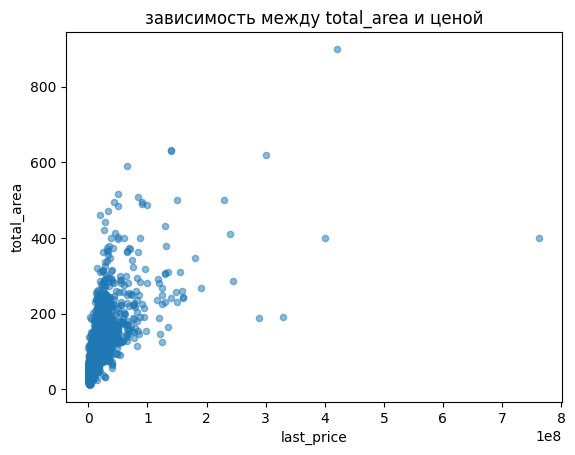

Коэффициент Пирсона между стоимомтью и living_area равен 0.5664915336952651


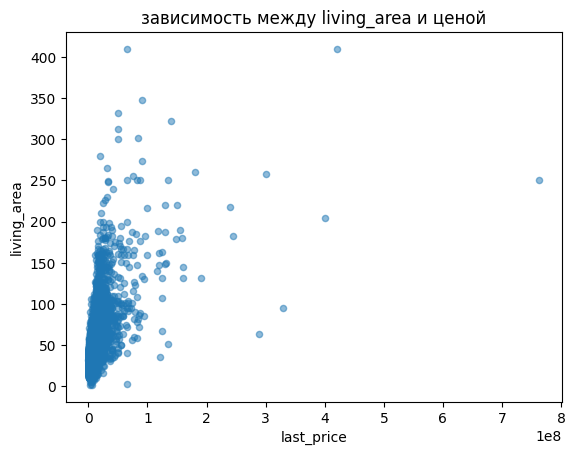

Коэффициент Пирсона между стоимомтью и kitchen_area равен 0.5198690130216392


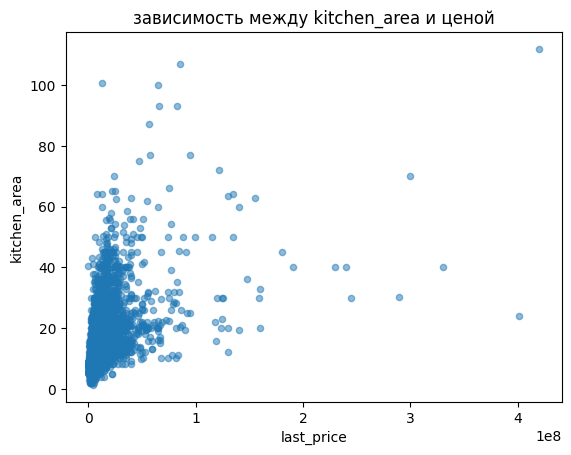

In [22]:
for column in ['total_area', 'living_area', 'kitchen_area']:
    print('Коэффициент Пирсона между стоимомтью и {} равен {}'.format(column,
                                                                      data['last_price'].corr(data[column])))
    data.plot(x='last_price',
              y=column,
              kind='scatter',
              alpha=0.5,
              title=f'зависимость между {column} и ценой')
    plt.show()

Для исследования взаимозависимости между числовыми переменными использовался коэффициент Пирсона. В целом между стоимостью и жилой площадью, кухонной площадью существует слабая положительная зависимость, а между стоимость и общей площадью средняя положительная, что подтверждают диаграммы рассеяния.

,last_price
rooms,
0,2700000.0
1,3600000.0
2,4770169.0
3,6200000.0
4,9000000.0
5,14000000.0
6,19000000.0
7,24900000.0
8,23095000.0


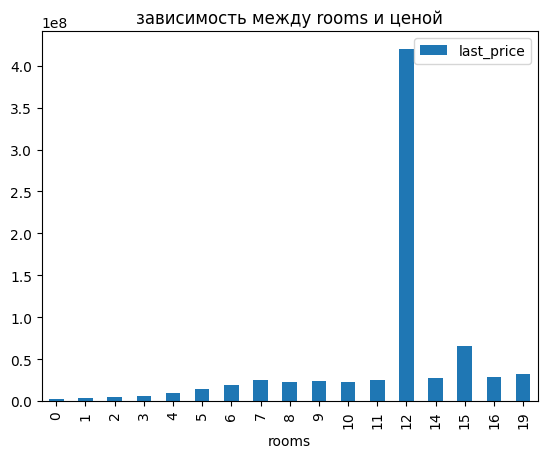

,last_price
type_floor,
другой,4850000.0
первый,3900000.0
последний,4300000.0


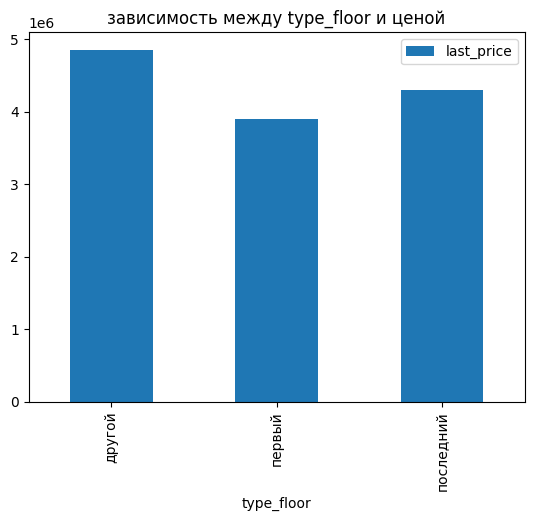

,last_price
weekday,
0,4650000.0
1,4730000.0
2,4700000.0
3,4650000.0
4,4585000.0
5,4555000.0
6,4550000.0


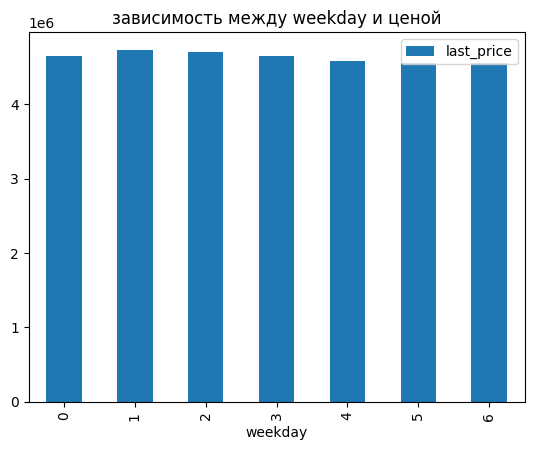

,last_price
month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4515000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


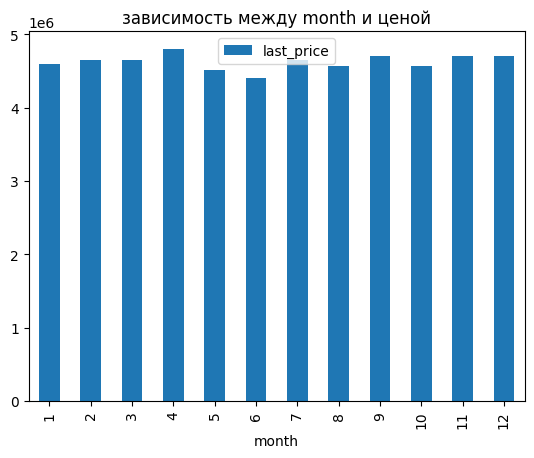

,last_price
year,
2014,7700000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


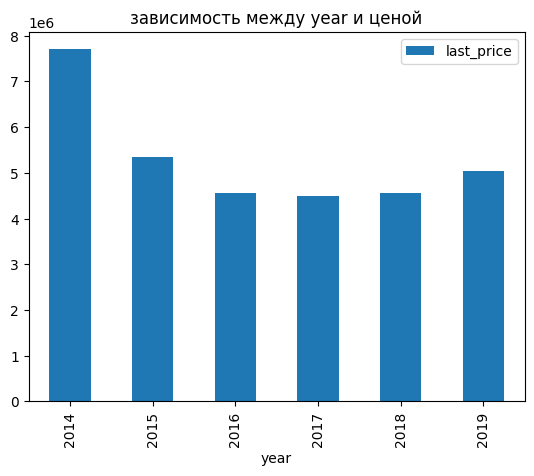

In [23]:
for column in ['rooms', 'type_floor', 'weekday', 'month', 'year']:
    p_t = data.pivot_table(index=column, values='last_price', aggfunc='median')
    display(p_t)
    p_t.reset_index(inplace=True)
    p_t.plot(x=column,
             y='last_price',
             kind='bar',
             title=f'зависимость между {column} и ценой')
    plt.show()

Взаимозависимость между категориальными (номинальными) переменными и числовой проанализированна с помощью сводной таблицы и столбчатой диаграммы. По графикам видно, что:
<ul>
    <li> Интересно, что самые дорогие квартиры продавались в декабре, в целом есть небольшая завмсимость</li>
    <li>Также слабая зависимость наблюдается между стоимостью и этажем, на первом и последнем этажах стоимость ниже, чем на других </li>
    <li> Не наблюдается зависимости с днем неделе</li>
    <li> Нет линейной зависимости с годом </li>

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [24]:
# найдем населенные пункты с наибольшем кол-вом объявлений
stat= data.pivot_table(index='locality_name',
                       values='balcony',
                       aggfunc='count')
stat = stat.rename(columns={'balcony': 'count'})

# поместим это города в список
citys = list(stat.sort_values(by='count',
                              ascending=False).head(10).index)

# сделаем срез по этим городам и построим сводную таблицу
good_data = (data
             .query('locality_name in @citys')
             .pivot_table(index='locality_name',
                          values='price_per_metr',
                          aggfunc='mean')
            .sort_values(by='price_per_metr',
                         ascending=False)
            )

# посчитаем среднее по средним величинам
avg_in_big_city = good_data['price_per_metr'].mean()

# делаем сводную таблицу по населенным пунктам и цене квадратного метра
df_find_city = data.pivot_table(index='locality_name',
                                values='price_per_metr')

# найдем крайние значения цены по городам
max_ = df_find_city['price_per_metr'].max()
min_ = df_find_city['price_per_metr'].min()

# выводим результат
print('среднее по городам с наибольшим кол-вом объявлений - {}'.format(avg_in_big_city))
print('город с самом дорогим метром - {}'.format(*df_find_city[df_find_city['price_per_metr'] == max_].index.to_list()))
print('город с самом дешевым метром - {}'.format(*df_find_city[df_find_city['price_per_metr'] == min_].index.to_list()))

среднее по городам с наибольшим кол-вом объявлений - 162467.58285099344
город с самом дорогим метром - новая ропша
город с самом дешевым метром - малая романовка


In [25]:
good_data

,price_per_metr
locality_name,
санкт-петербург,215046.515335
парголово,200718.185634
кудрово,196237.767121
пушкин,192254.113967
мурино,177783.552705
шушары,156337.357735
всеволожск,133545.020946
колпино,132023.061774
гатчина,121748.694097


<p> Вывод</p>
<ul>
    <li>среднее по городам с наибольшим кол-вом объявлений - 162467.58</li>
    <li>город с самом дорогим метром - новая ропша</li>
    <li>город с самом дешевым метром - малая романовка</li>
</ul>

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километрм до центра города

-0.7626407738785284

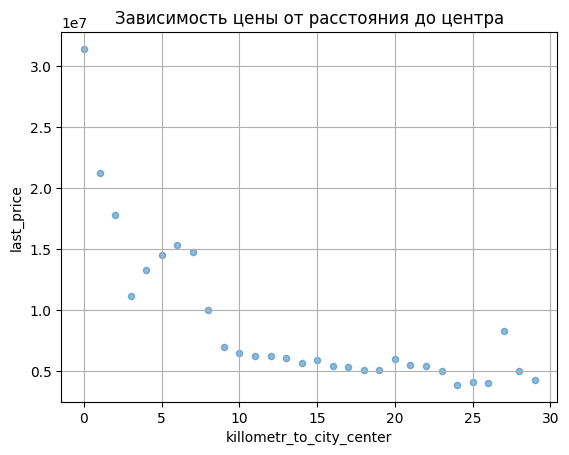

In [26]:
# сделаем срез
data_piter = data.query('locality_name == "санкт-петербург"')

# строим сводную таблицу
data_piter = data_piter.pivot_table(index='killometr_to_city_center',
                                    values='last_price')
data_piter.reset_index(inplace=True)

# строим график
data_piter.plot(x='killometr_to_city_center',
                y='last_price',
                kind='scatter',
                grid=True,
                alpha=0.5,
                title = 'Зависимость цены от расстояния до центра')
data_piter['last_price'].corr(data_piter['killometr_to_city_center'])

<p>Вывод</p>
Цены на квартиры в центре выше, наблюдается достаточно сильная обратная зависимость (коэффициент Пирсона - -0.76) 

### Общий вывод

<p><i><b>Общий вывод</b></i></p> 

<p>В ходе проекта были пройденны все намеченные этапы, а именно:
    <ul>
        <li> <ul><b>Предобработка данных</b>
            <li>убраны пропуски (там где это показалось логичным и обоснованным)</li>
            <li>проведена работа с дубликатами</li>
            <li>убраны артефакты по тз</li>
            <li>там, где это показалось необходимым изменен тип данных</li></ul></li>
        <li><ul><b>Работа с данными - посчитаны новые признаки</b>
             <li>price_per_metr - цена квадратного метра</li>
             <li>killometr_to_city_center - расстояние до центра города</li>
             <li>type_floor - тип этажа </li>
            <li>weekday - день недели публикации объявления</li>
            <li>month - месяц публикации объявления</li>
            <li>year - год публикации объявления</li></ul></li>
        <li><ul><b>Исследовательский анализ данных</b> 
             <li>построены гистограммы для количественных переменных и столбчатые для номинальных</li>
             <li>Исходя из графиков, были выявлены факторы, у которых наибольщая зависимость с стоимостью квартиры</li>
     </ul></ul>

<p><i><b>Результаты - рекомендации</b></i></p> 
        <ul>
        <li><ul><b>В качестве факторов, влияющих на рыночную стоимость, можно предложить:</b>
            <li>Общая площадь квартиры - так как существует средняя положительная зависимость</li>
            <li>Растояние до центра - хорошо зарекомендовал на срезе данных о Питере</li>
            <li>Из категориальных переменных - наилучшим вариатном является тип этажа</li></ul></li>
        <li><ul><b>В качестве критерия, для отслеживания мошейнических схем и выбросов можно использовать кол-во дней продажи</b>
            <li>продажи быстрее 1.0 дней - необычно быстрые</li>
            <li>продажи медленее 907.5 дней - необычно долгие</li></ul></li>
            
    